# Creating your own dataset from Google Images

In [5]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In this tutorial we will see how to easily create an image dataset through Google Images.

**Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Step 1: Search and scroll

Google for the images you are interested in. This can be any type of images you can google for (i.e. just type what you need in Google Search and click 'Images').  You should be **as precise as possible** when defining your categories. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

The maximum number of images Google Images shows is 700 and this is what we will get. Scroll down until you see a button that says 'Show more results' and click on it. Then continue scrolling until you cannot scroll anymore.


**Note**: Since some images will not be able to be downloaded or opened and some will not be useful, expect the actual size of the dataset to be reduced by 30%. If you need more images, you should make several similar queries and then delete duplicates (i.e. if doing dogs vs cats, search several races). Generally, making one search should be enough per category.

## Step 2: Download into file

Now you must run some Javascript code in your browser which will save the URL's of all the images you want for you dataset.

Press <kbd>CTRL</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>CMMD</kbd><kbd>OPT</kbd><kbd>J</kbd> in Mac and a small window with Developer Tools will appear. Click on 'Console' and that is where you will type the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following command:

`var urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(function(el) { return JSON.parse(el.textContent).ou; });`

You will see that your browser's console outputs 'undefined'. That's fine.

Next, you will need to save all these urls to a file. You can do this in the same console by running the following script. You need to change `hiddenElement.download = 'urls_cats.txt'` replacing 'cats' by your category.

`var textToSave = urls.join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls_cats.txt';
hiddenElement.click();`

Again the browser will output 'undefined'.

![](console.png)

## Step 3: Create directory and upload urls file into your server

First let's create a project directory. Open the notebook terminal and run this command in the directory where you want your working directory to be.

`mkdir MyProject`

Where 'MyProject' is the name of your project. Now we will move into that directory and create a directory for our data:

`cd MyProject`

`mkdir data`

Finally, we will upload our urls file. You just need to press Upload in your working directory and select your file.

![](upload.png)

## Step 4: Download images

Now you will need to download you images from their respective urls.

Here is a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

In [6]:
def download_images(urls, dest, max_pics=1000):
    "Download images listed in text file `urls` to path `dest`, at most `max_pics`"
    urls = open(urls).read().strip().split("\n")
    dest = Path(dest)
    dest.mkdir(exist_ok=True)

    for i,url in enumerate(master_bar(urls)):
        if i >= max_pics:
            print('Max number of images downloaded')
            break
        try: r = download_url(url, dest/f"{i:08d}.jpg", overwrite=True)
        except: print(f"Error downloading {url}...skipping")
        print(dest/f"{i:08d}.jpg")

    for file in os.listdir(dest):
        f_img = dest/file
        try:    assert open_image(f_img).shape[0]==3
        except: f_img.unlink(), f'incorrect image format: {file}'

We are going to create paths to our class' directory and our urls file's directory. These are going to be the arguments for our function.

In [7]:
dest = 'data/cats'
urls_file = 'urls_cats.txt'

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [8]:
download_images(urls_file, dest, 40)

data/cats/00000000.jpg


data/cats/00000001.jpg


data/cats/00000002.jpg


data/cats/00000003.jpg


data/cats/00000004.jpg


data/cats/00000005.jpg


data/cats/00000006.jpg


data/cats/00000007.jpg


data/cats/00000008.jpg


data/cats/00000009.jpg


data/cats/00000010.jpg


data/cats/00000011.jpg


data/cats/00000012.jpg


data/cats/00000013.jpg


data/cats/00000014.jpg


data/cats/00000015.jpg


data/cats/00000016.jpg


data/cats/00000017.jpg


data/cats/00000018.jpg
Error downloading https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg?auto=compress&cs=tinysrgb&h=350...skipping
data/cats/00000019.jpg


data/cats/00000020.jpg


data/cats/00000021.jpg


data/cats/00000022.jpg


data/cats/00000023.jpg


data/cats/00000024.jpg
Error downloading https://imagesvc.timeincapp.com/v3/mm/image?url=https%3A%2F%2Fimages.hellogiggles.com%2Fuploads%2F2015%2F12%2F11083247%2Fcat.jpg&w=700&q=85...skipping
data/cats/00000025.jpg


data/cats/00000026.jpg


data/cats/00000027.jpg
Error downloading https://images.pexels.com/photos/104827/cat-pet-animal-domestic-104827.jpeg?cs=srgb&dl=animal-animal-photography-cat-104827.jpg&fm=jpg...skipping
data/cats/00000028.jpg


data/cats/00000029.jpg


data/cats/00000030.jpg


data/cats/00000031.jpg
Error downloading https://www.argospetinsurance.co.uk/assets/uploads/2017/10/pexels-photo-416160.jpeg...skipping
data/cats/00000032.jpg


data/cats/00000033.jpg


data/cats/00000034.jpg


data/cats/00000035.jpg


data/cats/00000036.jpg


data/cats/00000037.jpg


data/cats/00000038.jpg


data/cats/00000039.jpg
Max number of images downloaded


Good! Let's take a look at some of our pictures then.

In [9]:
images = []
cats_path = Path('data/cats')
for file in os.listdir(cats_path):
    images.append(open_image(cats_path/file))

In [10]:
len(images)

33

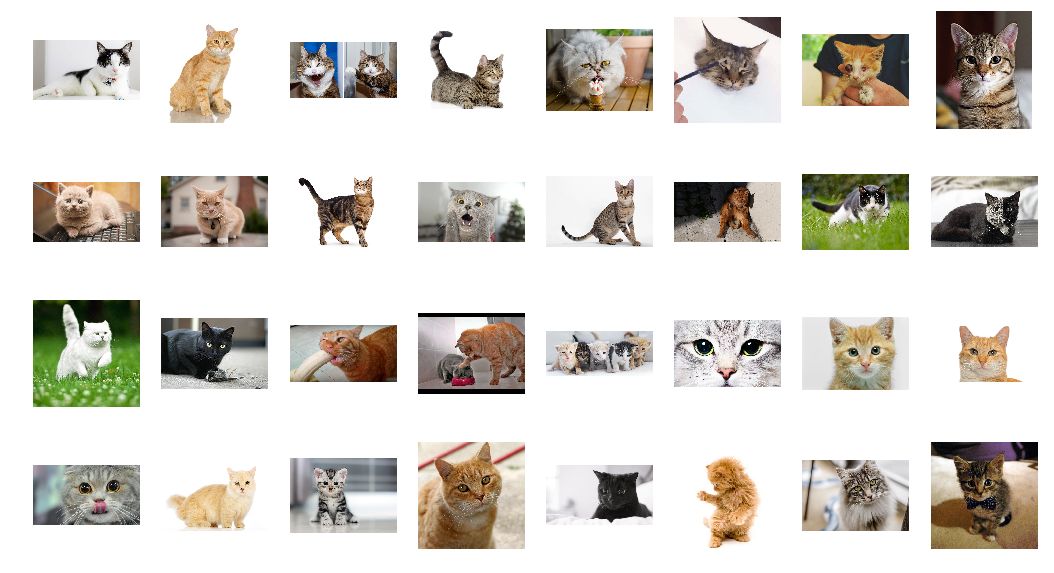

In [11]:
fig, axs = plt.subplots(4,8,figsize=(18,10))
for i, ax in enumerate(axs.flatten()):
    images[i].show(ax=ax)

## Step 5: Prune images

As you can seem the images come in all forms. So after correctly downloading your dataset you should manually go through your folder, deleting any image that you do not find useful. This is a tedious process but it ensures our model solves the right problem.

## Step 6: Prepare directory for training

To make your dataset ready for training, you should divide it into training, validation and test sets. A script is being built for this. 

In the meantime, move into the folder for your category calling:

`cd data/cats`

Create training and validation folders:

`mkdir train`

`mkdir valid`

Move 80% of your dataset into train and the rest into valid:

``mv `ls *.jpg | head -26` train``

``mv `ls *.jpg` valid``

where '26' is 80% of your dataset (we have effectively downloaded 33 images).